## Sample notebook for seminar project ML for SSP

Pay attention to name of variables in PATH

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.display import Markdown, display

# Scalers
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Classifiers
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

# Metrics
import sklearn.metrics as skm

# Cross validation
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold

np.random.seed(123)

You will probably need to install aif360 package, so refer to this link: https://github.com/Trusted-AI/AIF360

Or this: https://jakevdp.github.io/blog/2017/12/05/installing-python-packages-from-jupyter/

Use this: https://anaconda.org/conda-forge/aif360 or https://github.com/conda-forge/aif360-feedstock if previous doesn't work


UPD: it worked using only `pip`

UPD: you will probably need to install fairlearn package `pip install fairlearn`

In [2]:
# Datapathes

TRAIN_DATAPATH = r'D:\Uni\SS 2022\Seminar ML for SSP\Debiasing_Clinical_Data\Data\train\functionals_train_all.csv'
TEST_DATAPATH = r'D:\Uni\SS 2022\Seminar ML for SSP\Debiasing_Clinical_Data\Data\test\functionals_test_all.csv'

In [3]:
# reading data

train = pd.read_csv(TRAIN_DATAPATH)
test = pd.read_csv(TEST_DATAPATH)

In [4]:
train.head()

,Unnamed: 0,id,age,gender,mmse,diagnosis,F0semitoneFrom27.5Hz_sma3nz_amean,F0semitoneFrom27.5Hz_sma3nz_stddevNorm,F0semitoneFrom27.5Hz_sma3nz_percentile20.0,F0semitoneFrom27.5Hz_sma3nz_percentile50.0,...,slopeUV0-500_sma3nz_amean,slopeUV500-1500_sma3nz_amean,spectralFluxUV_sma3nz_amean,loudnessPeaksPerSec,VoicedSegmentsPerSec,MeanVoicedSegmentLengthSec,StddevVoicedSegmentLengthSec,MeanUnvoicedSegmentLength,StddevUnvoicedSegmentLength,equivalentSoundLevel_dBp
0,0,S001,74,male,NA,0,26.158813,0.256494,23.504830,25.390327,...,0.033982,-0.007878,0.025659,2.082161,1.610542,0.398252,0.395510,0.250614,0.467176,-29.529222
1,1,S002,62,female,30,0,35.038100,0.222455,32.094150,33.338820,...,0.029004,-0.006766,0.018389,0.105116,0.666316,0.105000,0.070366,1.412162,1.798986,-43.936977
2,2,S003,69,female,29,0,33.408146,0.167676,30.763927,33.175510,...,0.027397,-0.006148,0.020994,2.314480,1.375416,0.455579,0.408640,0.291481,0.738442,-25.290459
3,3,S004,71,female,30,0,31.709782,0.220399,29.273027,31.521568,...,0.027672,-0.003709,0.038795,2.695713,1.712295,0.367209,0.345697,0.235282,0.462315,-27.811728
4,4,S005,74,female,30,0,33.117634,0.210555,29.349773,31.528109,...,0.021428,-0.001211,0.005301,0.405904,1.046154,0.105647,0.085536,0.800909,1.251056,-49.826008


In [5]:
test.head()

#comment: 1 - female, 0 - male

,Unnamed: 0,F0semitoneFrom27.5Hz_sma3nz_amean,F0semitoneFrom27.5Hz_sma3nz_stddevNorm,F0semitoneFrom27.5Hz_sma3nz_percentile20.0,F0semitoneFrom27.5Hz_sma3nz_percentile50.0,F0semitoneFrom27.5Hz_sma3nz_percentile80.0,F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2,F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope,F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope,F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope,...,MeanVoicedSegmentLengthSec,StddevVoicedSegmentLengthSec,MeanUnvoicedSegmentLength,StddevUnvoicedSegmentLength,equivalentSoundLevel_dBp,id,age,gender,diagnosis,mmse
0,0,31.396942,0.154061,30.213425,31.718218,33.796870,3.583446,177.98373,132.606320,216.58685,...,0.344048,0.342380,0.302286,0.547483,-22.975720,S160,63,1,0,28
1,1,29.956886,0.118317,28.500713,29.874610,31.048702,2.547989,163.17845,170.156390,146.55635,...,0.140119,0.154052,0.724940,1.355301,-57.484940,S161,55,1,0,29
2,2,19.633840,0.402905,13.825209,14.831374,31.307632,17.482424,209.11266,314.103150,78.85801,...,1.483673,1.388053,0.055946,0.046988,-25.289870,S162,67,1,1,24
3,3,28.083347,0.266278,24.390467,26.107916,29.036630,4.646164,416.17200,769.896240,225.06831,...,0.368082,0.375981,0.151600,0.184023,-29.287306,S163,71,0,0,30
4,4,34.369990,0.078030,33.367874,34.617860,35.442660,2.074787,58.16399,31.168308,367.91990,...,0.074000,0.034409,5.053333,6.706737,-66.156525,S164,73,1,1,21


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 94 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Unnamed: 0                                      108 non-null    int64  
 1   id                                              108 non-null    object 
 2   age                                             108 non-null    int64  
 3   gender                                          108 non-null    object 
 4   mmse                                            108 non-null    object 
 5   diagnosis                                       108 non-null    int64  
 6   F0semitoneFrom27.5Hz_sma3nz_amean               108 non-null    float64
 7   F0semitoneFrom27.5Hz_sma3nz_stddevNorm          108 non-null    float64
 8   F0semitoneFrom27.5Hz_sma3nz_percentile20.0      108 non-null    float64
 9   F0semitoneFrom27.5Hz_sma3nz_percentile50.0 

In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 94 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Unnamed: 0                                      48 non-null     int64  
 1   F0semitoneFrom27.5Hz_sma3nz_amean               48 non-null     float64
 2   F0semitoneFrom27.5Hz_sma3nz_stddevNorm          48 non-null     float64
 3   F0semitoneFrom27.5Hz_sma3nz_percentile20.0      48 non-null     float64
 4   F0semitoneFrom27.5Hz_sma3nz_percentile50.0      48 non-null     float64
 5   F0semitoneFrom27.5Hz_sma3nz_percentile80.0      48 non-null     float64
 6   F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2        48 non-null     float64
 7   F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope     48 non-null     float64
 8   F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope   48 non-null     float64
 9   F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope 

In [8]:
# preprocessing
features = ["F2frequency_sma3nz_amean", 
             "HNRdBACF_sma3nz_amean", 
             "F0semitoneFrom27.5Hz_sma3nz_percentile80.0", 
             "F0semitoneFrom27.5Hz_sma3nz_amean",
             "F1frequency_sma3nz_amean",
             "gender", "diagnosis"]

train['gender'] = train['gender'].replace(['female', 'male'], [1, 0])

train_df = train[features]
test_df = test[features]

In [9]:
# function for calculating accuracy, sensitivity and specificity

def classification_results(y_true, y_pred):
    print(skm.confusion_matrix(y_true, y_pred))
    tn, fp, fn, tp = skm.confusion_matrix(y_true, y_pred).ravel()
    specificity = tn / (tn + fp)
    sensitivity = tp / (tp + fn)
    accuracy = skm.accuracy_score(y_pred=y_pred, y_true=y_true)
    print('Accuracy: ', accuracy)
    print('Sensitivity: ', sensitivity)
    print('Specificity: ', specificity)

In [10]:
# function for evaluating during CV, full train and test datasets

def evaluate_model(model, data_x, data_y, X_test, y_test, k=5):
    '''returns trained classifier'''
    k_fold = KFold(k, shuffle=True, random_state=1)

    predicted_targets = np.array([])
    actual_targets = np.array([])
    
    display(Markdown("#### Results of k-fold CV on training set"))
    for train_ix, test_ix in k_fold.split(data_x):
        train_x, train_y, test_x, test_y = data_x.iloc[train_ix], data_y.iloc[train_ix], data_x.iloc[test_ix], data_y.iloc[test_ix]

        # Fit the classifier
        classifier = model.fit(train_x, train_y)

        # Predict the labels of the test set samples
        predicted_labels_fold = classifier.predict(test_x)

        predicted_targets = np.append(predicted_targets, predicted_labels_fold)
        actual_targets = np.append(actual_targets, test_y)
        
        classification_results(test_y, predicted_labels_fold)
        print('')
        
    display(Markdown("#### Results on the whole training set"))
    classification_results(actual_targets, predicted_targets)
    
    
    display(Markdown("#### Results on test set"))
    classification_results(y_test, classifier.predict(X_test))
    
    return classifier
        
    

### Logistic regression model

In [11]:
features_lr = ["F0semitoneFrom27.5Hz_sma3nz_percentile80.0", 
                 "F1frequency_sma3nz_amean", 
                 "HNRdBACF_sma3nz_amean", 
                 "F0semitoneFrom27.5Hz_sma3nz_amean",
                 "gender"]

Y_train = train_df["diagnosis"]
X_train = train_df[features_lr]

Y_test = test_df["diagnosis"]
X_test = test_df[features_lr]


In [12]:
model_lr = Pipeline(
    steps=[
        (
            "classifier",
            LogisticRegression(solver='liblinear', penalty = 'l2', class_weight = 'balanced'),
        ),
    ]
)

model_lr = evaluate_model(model_lr, X_train, Y_train, X_test, Y_test)

#### Results of k-fold CV on training set

[[ 2  2]
 [ 5 13]]
Accuracy:  0.6818181818181818
Sensitivity:  0.7222222222222222
Specificity:  0.5

[[13  1]
 [ 5  3]]
Accuracy:  0.7272727272727273
Sensitivity:  0.375
Specificity:  0.9285714285714286

[[7 4]
 [2 9]]
Accuracy:  0.7272727272727273
Sensitivity:  0.8181818181818182
Specificity:  0.6363636363636364

[[7 4]
 [4 6]]
Accuracy:  0.6190476190476191
Sensitivity:  0.6
Specificity:  0.6363636363636364

[[8 6]
 [3 4]]
Accuracy:  0.5714285714285714
Sensitivity:  0.5714285714285714
Specificity:  0.5714285714285714



#### Results on the whole training set

[[37 17]
 [19 35]]
Accuracy:  0.6666666666666666
Sensitivity:  0.6481481481481481
Specificity:  0.6851851851851852


#### Results on test set

[[16  8]
 [ 7 17]]
Accuracy:  0.6875
Sensitivity:  0.7083333333333334
Specificity:  0.6666666666666666


### Random forest model

In [13]:
features_rf = ["F0semitoneFrom27.5Hz_sma3nz_percentile80.0", 
                 "F1frequency_sma3nz_amean", 
                 "HNRdBACF_sma3nz_amean", 
                 "F0semitoneFrom27.5Hz_sma3nz_amean",
                 "gender"]

Y_train = train_df["diagnosis"]
X_train = train_df[features_rf]

Y_test = test_df["diagnosis"]
X_test = test_df[features_rf]

In [14]:
model_rf = Pipeline(
    steps=[
        ("preprocessor", MinMaxScaler()),
        (
            "classifier",
            RandomForestClassifier(n_estimators=200, min_samples_leaf=20,
                                                               class_weight='balanced'),
        ),
    ]
)

model_rf = evaluate_model(model_rf, X_train, Y_train, X_test, Y_test)

#### Results of k-fold CV on training set

[[ 1  3]
 [ 6 12]]
Accuracy:  0.5909090909090909
Sensitivity:  0.6666666666666666
Specificity:  0.25

[[11  3]
 [ 4  4]]
Accuracy:  0.6818181818181818
Sensitivity:  0.5
Specificity:  0.7857142857142857

[[6 5]
 [7 4]]
Accuracy:  0.45454545454545453
Sensitivity:  0.36363636363636365
Specificity:  0.5454545454545454

[[9 2]
 [4 6]]
Accuracy:  0.7142857142857143
Sensitivity:  0.6
Specificity:  0.8181818181818182

[[8 6]
 [2 5]]
Accuracy:  0.6190476190476191
Sensitivity:  0.7142857142857143
Specificity:  0.5714285714285714



#### Results on the whole training set

[[35 19]
 [23 31]]
Accuracy:  0.6111111111111112
Sensitivity:  0.5740740740740741
Specificity:  0.6481481481481481


#### Results on test set

[[16  8]
 [ 8 16]]
Accuracy:  0.6666666666666666
Sensitivity:  0.6666666666666666
Specificity:  0.6666666666666666


### kNN model

In [15]:
features_knn = ["F0semitoneFrom27.5Hz_sma3nz_percentile80.0", 
                 "HNRdBACF_sma3nz_amean", 
                 "F0semitoneFrom27.5Hz_sma3nz_amean",
                 "gender"]

Y_train = train_df["diagnosis"]
X_train = train_df[features_knn]

Y_test = test_df["diagnosis"]
X_test = test_df[features_knn]

In [16]:
model_knn = Pipeline(
    steps=[
        ("preprocessor", MinMaxScaler()),
        (
            "classifier",
            KNeighborsClassifier(n_neighbors=3),
        ),
    ]
)

model_knn = evaluate_model(model_knn, X_train, Y_train, X_test, Y_test)

#### Results of k-fold CV on training set

[[ 4  0]
 [ 8 10]]
Accuracy:  0.6363636363636364
Sensitivity:  0.5555555555555556
Specificity:  1.0

[[5 9]
 [3 5]]
Accuracy:  0.45454545454545453
Sensitivity:  0.625
Specificity:  0.35714285714285715

[[7 4]
 [6 5]]
Accuracy:  0.5454545454545454
Sensitivity:  0.45454545454545453
Specificity:  0.6363636363636364

[[3 8]
 [4 6]]
Accuracy:  0.42857142857142855
Sensitivity:  0.6
Specificity:  0.2727272727272727

[[5 9]
 [1 6]]
Accuracy:  0.5238095238095238
Sensitivity:  0.8571428571428571
Specificity:  0.35714285714285715



#### Results on the whole training set

[[24 30]
 [22 32]]
Accuracy:  0.5185185185185185
Sensitivity:  0.5925925925925926
Specificity:  0.4444444444444444


#### Results on test set

[[14 10]
 [ 5 19]]
Accuracy:  0.6875
Sensitivity:  0.7916666666666666
Specificity:  0.5833333333333334


### Radial based SVM

In [17]:
features_svm = ["F2frequency_sma3nz_amean", 
                    "F0semitoneFrom27.5Hz_sma3nz_percentile80.0", 
                    "F0semitoneFrom27.5Hz_sma3nz_amean",
                     "gender"]

Y_train = train_df["diagnosis"]
X_train = train_df[features_svm]

Y_test = test_df["diagnosis"]
X_test = test_df[features_svm]

In [18]:
model_svm = Pipeline(
    steps=[
        ("preprocessor", MinMaxScaler()),
        (
            "classifier",
            SVC(kernel = 'rbf', gamma = 4.0, C = 3.0),
        ),
    ]
)


model_svm = evaluate_model(model_svm, X_train, Y_train, X_test, Y_test)

#### Results of k-fold CV on training set

[[ 4  0]
 [ 8 10]]
Accuracy:  0.6363636363636364
Sensitivity:  0.5555555555555556
Specificity:  1.0

[[9 5]
 [1 7]]
Accuracy:  0.7272727272727273
Sensitivity:  0.875
Specificity:  0.6428571428571429

[[5 6]
 [5 6]]
Accuracy:  0.5
Sensitivity:  0.5454545454545454
Specificity:  0.45454545454545453

[[6 5]
 [1 9]]
Accuracy:  0.7142857142857143
Sensitivity:  0.9
Specificity:  0.5454545454545454

[[9 5]
 [2 5]]
Accuracy:  0.6666666666666666
Sensitivity:  0.7142857142857143
Specificity:  0.6428571428571429



#### Results on the whole training set

[[33 21]
 [17 37]]
Accuracy:  0.6481481481481481
Sensitivity:  0.6851851851851852
Specificity:  0.6111111111111112


#### Results on test set

[[18  6]
 [ 8 16]]
Accuracy:  0.7083333333333334
Sensitivity:  0.6666666666666666
Specificity:  0.75


#### Results on the test set without debiasing

| Model       | Logistic regression | Random forest | kNN    |  SVM   |  
|------       |------               | ------        |------  | ------ |
| Accuracy    |  0.6875             |  0.666        | 0.6875 | 0.7083 | 
| Sensitivity |  0.7083             |  0.666        | 0.7916 | 0.6666 | 
| Specificity |  0.6666             |  0.666        | 0.5833 | 0.75   | 

## Applying debiasing techniques

### in-processing algorithms

In [19]:
# AIF360 Metrics
from aif360.sklearn.metrics import statistical_parity_difference, equal_opportunity_difference, average_odds_difference
from aif360.sklearn.metrics import disparate_impact_ratio, theil_index

# AIF360 in-processing algorithms

from aif360.sklearn.inprocessing import ExponentiatedGradientReduction
from aif360.sklearn.inprocessing import GridSearchReduction

# AIF360 dataset utils
from aif360.sklearn.datasets import standardize_dataset

# import of fairlearn
import fairlearn.reductions as red
from fairlearn.metrics import true_negative_rate
import fairlearn.metrics as fm

In [20]:
def get_values_of_aif_metrics(y_test, y_pred):
    print('Statistical parity difference: ', statistical_parity_difference(y_test, y_pred))
    print('Equal opportunity difference: ', equal_opportunity_difference(y_test, y_pred))
    print('Average odds difference: ', average_odds_difference(y_test, y_pred))
    print('Disparate impact ratio: ', disparate_impact_ratio(y_test, y_pred))
    print('Theil index: ', theil_index(y_pred))

In [21]:
# creating aif360 dataset
def create_dataset(train_df, test_df, target, prot_attr_cols, usecols):
    X_train_aif, y_train_aif = standardize_dataset(df = train_df, prot_attr=prot_attr_cols, 
                                               target = target, usecols=usecols)
    X_test_aif, y_test_aif = standardize_dataset(df = test_df, prot_attr=prot_attr_cols, target = target,
                                            usecols=usecols)
    return X_train_aif, y_train_aif, X_test_aif, y_test_aif

In [22]:
metrics = {
    'accuracy': skm.accuracy_score,
    'sensitivity': skm.recall_score,  
    'specificity': fm.true_negative_rate       
            }

def plot_metrics(y_true, X, metrics, model, sens_feature):
    
    metric_frame = fm.MetricFrame(metrics=metrics,
                           y_true=y_true,
                           y_pred=model.predict(X),
                           sensitive_features=X[sens_feature])

    metric_frame.by_group.plot.bar(
        subplots=True,
        layout=[1, 3],
        legend=False,
        figsize=[16, 5],
        ylim = [0, 1],
        title="Show all metrics")
    
    print(metric_frame.by_group)

In [23]:
prot_attr_cols = [colname for colname in train_df if "gender" in colname]
prot_attr_cols

['gender']

### Logistic regression

In [38]:
X_train_aif, y_train_aif, X_test_aif, y_test_aif = create_dataset(train_df, test_df, 'diagnosis', prot_attr_cols, features_lr)

Statistical parity difference:  0.12937062937062938
Equal opportunity difference:  0.2027972027972028
Average odds difference:  0.12937062937062938
Disparate impact ratio:  1.2803030303030303
Theil index:  0.6523251860396903

        accuracy sensitivity specificity
gender                                  
0       0.727273    0.818182    0.636364
1       0.653846    0.615385    0.692308

[[16  8]
 [ 7 17]]
Accuracy:  0.6875
Sensitivity:  0.7083333333333334
Specificity:  0.6666666666666666


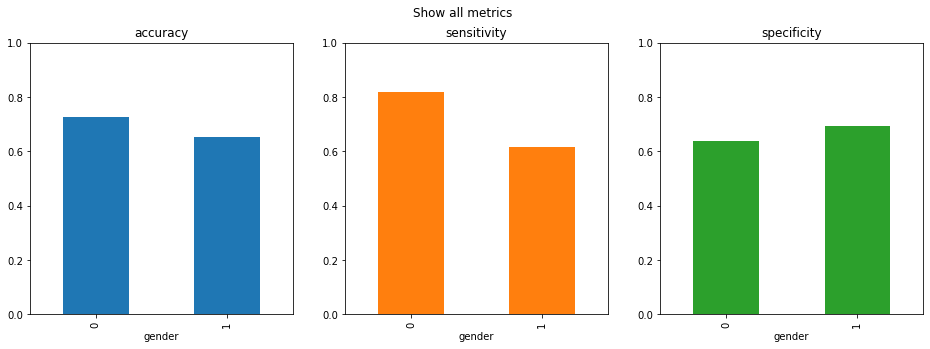

In [39]:
# results for default model 

get_values_of_aif_metrics(y_test_aif, model_lr.predict(X_test_aif))
print('')
plot_metrics(y_test_aif, X_test_aif, metrics, model_lr, 'gender')
print('')
classification_results(y_test_aif, model_lr.predict(X_test_aif))

Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
Using the level keyword in DataFrame and Seri

Statistical parity difference:  0.07692307692307693
Equal opportunity difference:  0.2027972027972028
Average odds difference:  0.07692307692307693
Disparate impact ratio:  1.1818181818181819
Theil index:  0.7801585575495752

        accuracy sensitivity specificity
gender                                  
0       0.818182    0.818182    0.818182
1       0.692308    0.615385    0.769231

[[19  5]
 [ 7 17]]
Accuracy:  0.75
Sensitivity:  0.7083333333333334
Specificity:  0.7916666666666666


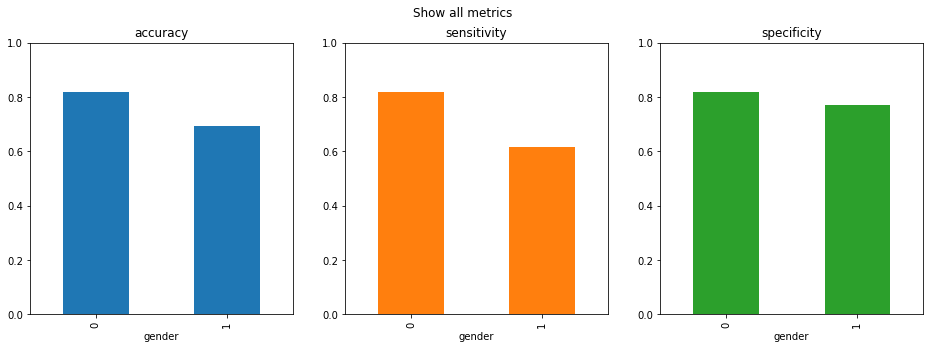

In [40]:
# results for debiased model with GridSearch

model_lr_fair = red.GridSearch(model_lr,
                               constraints=red.EqualizedOdds(),
                              sample_weight_name="classifier__sample_weight")
model_lr_fair.fit(X_train_aif, y_train_aif, sensitive_features=X_train_aif['gender'])

get_values_of_aif_metrics(y_test_aif, model_lr_fair.predict(X_test_aif))
print('')
plot_metrics(y_test_aif, X_test_aif, metrics, model_lr_fair, 'gender')
print('')
classification_results(y_test_aif, model_lr_fair.predict(X_test_aif))

Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
Using the level keyword in DataFrame and Seri

Statistical parity difference:  0.038461538461538436
Equal opportunity difference:  0.2027972027972028
Average odds difference:  0.038461538461538436
Disparate impact ratio:  1.0833333333333333
Theil index:  0.735706794978741

        accuracy sensitivity specificity
gender                                  
0       0.818182    0.818182    0.818182
1       0.653846    0.615385    0.692308

[[18  6]
 [ 7 17]]
Accuracy:  0.7291666666666666
Sensitivity:  0.7083333333333334
Specificity:  0.75


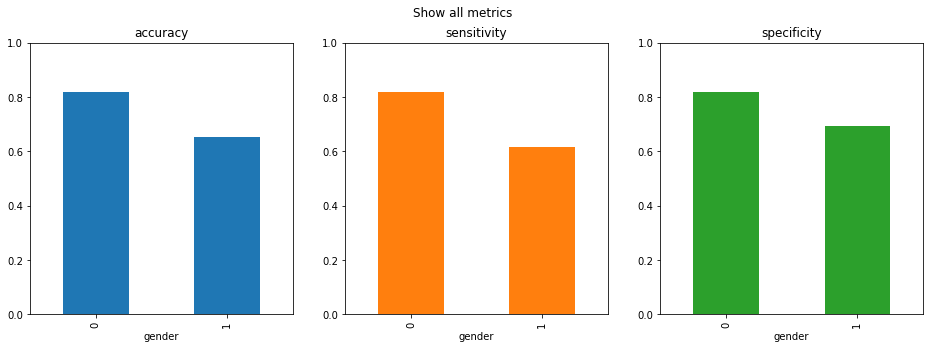

In [45]:
# results for debiased model with ExponentiatedGradient

model_lr_fair = red.ExponentiatedGradient(model_lr,
                               constraints=red.DemographicParity(),
                              sample_weight_name="classifier__sample_weight")
model_lr_fair.fit(X_train_aif, y_train_aif, sensitive_features=X_train_aif['gender'])

get_values_of_aif_metrics(y_test_aif, model_lr_fair.predict(X_test_aif))
print('')
plot_metrics(y_test_aif, X_test_aif, metrics, model_lr_fair, 'gender')
print('')
classification_results(y_test_aif, model_lr_fair.predict(X_test_aif))

#### Results:

Model's performance improved

### Random forest model

In [46]:
X_train_aif, y_train_aif, X_test_aif, y_test_aif = create_dataset(train_df, test_df, 'diagnosis', prot_attr_cols, features_rf)

Statistical parity difference:  -0.3356643356643357
Equal opportunity difference:  -0.22377622377622386
Average odds difference:  -0.3356643356643357
Disparate impact ratio:  0.48663101604278075
Theil index:  0.6931471805599453

        accuracy sensitivity specificity
gender                                  
0       0.727273    0.545455    0.909091
1       0.615385    0.769231    0.461538

[[16  8]
 [ 8 16]]
Accuracy:  0.6666666666666666
Sensitivity:  0.6666666666666666
Specificity:  0.6666666666666666


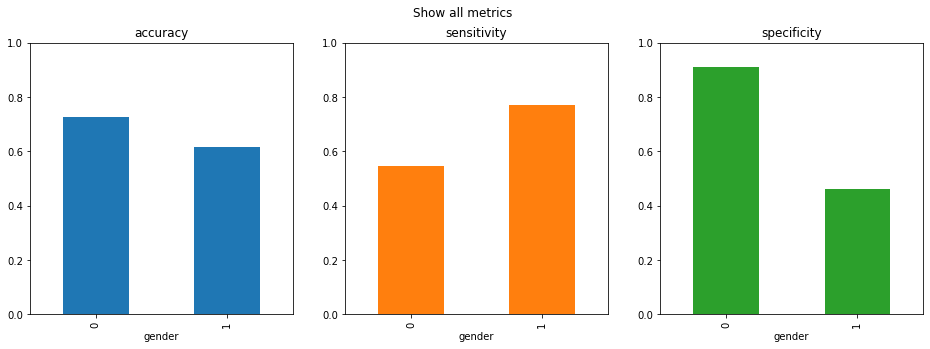

In [47]:
# results for default model 

get_values_of_aif_metrics(y_test_aif, model_rf.predict(X_test_aif))
print('')
plot_metrics(y_test_aif, X_test_aif, metrics, model_rf, 'gender')
print('')
classification_results(y_test_aif, model_rf.predict(X_test_aif))

Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
Using the level keyword in DataFrame and Seri

Statistical parity difference:  -0.2727272727272727
Equal opportunity difference:  -0.2517482517482518
Average odds difference:  -0.2727272727272727
Disparate impact ratio:  0.45454545454545453
Theil index:  0.9808292530117262

        accuracy sensitivity specificity
gender                                  
0       0.636364    0.363636    0.909091
1       0.615385    0.615385    0.615385

[[18  6]
 [12 12]]
Accuracy:  0.625
Sensitivity:  0.5
Specificity:  0.75


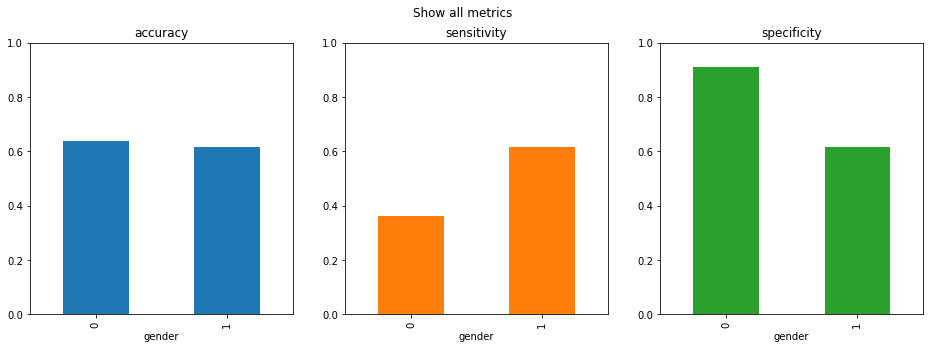

In [48]:
# results for debiased model with GridSearch

model_rf_fair = red.GridSearch(model_rf,
                               constraints=red.DemographicParity(),
                              sample_weight_name="classifier__sample_weight",)
model_rf_fair.fit(X_train_aif, y_train_aif, sensitive_features=X_train_aif['gender'])

get_values_of_aif_metrics(y_test_aif, model_rf_fair.predict(X_test_aif))
print('')
plot_metrics(y_test_aif, X_test_aif, metrics, model_rf_fair, 'gender')
print('')
classification_results(y_test_aif, model_rf_fair.predict(X_test_aif))

Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
Using the level keyword in DataFrame and Seri

Statistical parity difference:  -0.07342657342657344
Equal opportunity difference:  -0.0839160839160839
Average odds difference:  -0.07342657342657341
Disparate impact ratio:  0.7878787878787878
Theil index:  1.1631508098056809

        accuracy sensitivity specificity
gender                                  
0       0.681818    0.454545    0.909091
1       0.692308    0.538462    0.846154

[[21  3]
 [12 12]]
Accuracy:  0.6875
Sensitivity:  0.5
Specificity:  0.875


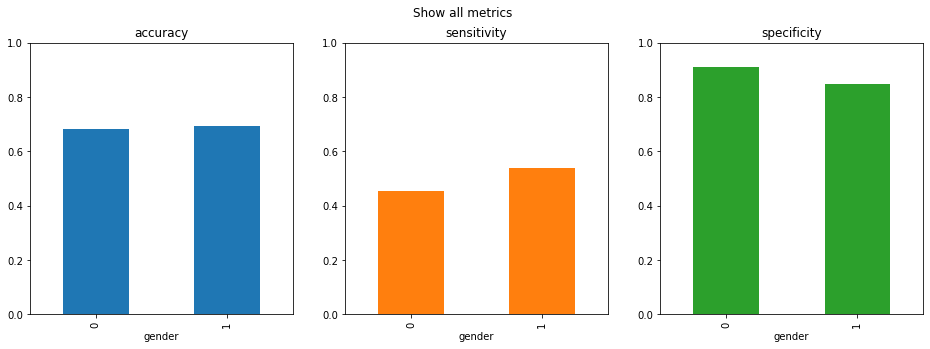

In [52]:
# results for debiased model with ExponentiatedGradient

model_rf_fair = red.ExponentiatedGradient(model_rf,
                               constraints=red.TruePositiveRateParity(),
                              sample_weight_name="classifier__sample_weight",)
model_rf_fair.fit(X_train_aif, y_train_aif, sensitive_features=X_train_aif['gender'])

get_values_of_aif_metrics(y_test_aif, model_rf_fair.predict(X_test_aif))
print('')
plot_metrics(y_test_aif, X_test_aif, metrics, model_rf_fair, 'gender')
print('')
classification_results(y_test_aif, model_rf_fair.predict(X_test_aif))

#### Results:
Model performance didn't improve and even became a bit worse.

### kNN model

In [30]:
X_train_aif, y_train_aif, X_test_aif, y_test_aif = create_dataset(train_df, test_df, 'diagnosis', prot_attr_cols, features_knn)

Statistical parity difference:  0.2272727272727273
Equal opportunity difference:  0.21678321678321677
Average odds difference:  0.22727272727272727
Disparate impact ratio:  1.4545454545454546
Theil index:  0.503905180921417

        accuracy sensitivity specificity
gender                                  
0       0.681818    0.909091    0.454545
1       0.692308    0.692308    0.692308

[[14 10]
 [ 5 19]]
Accuracy:  0.6875
Sensitivity:  0.7916666666666666
Specificity:  0.5833333333333334


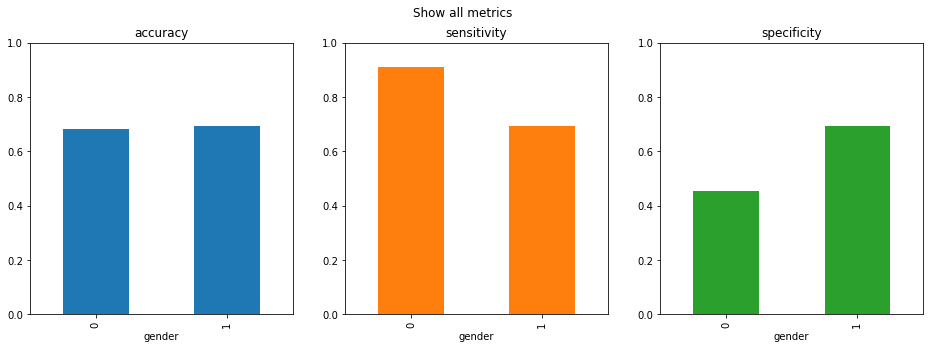

In [31]:
# results for default model

get_values_of_aif_metrics(y_test_aif, model_knn.predict(X_test_aif))
print('')
plot_metrics(y_test_aif, X_test_aif, metrics, model_knn, 'gender')
print('')
classification_results(y_test_aif, model_knn.predict(X_test_aif))

In [32]:
# results for debiased model with GridSearch

model_knn_fair = red.GridSearch(model_knn,
                               constraints=red.EqualizedOdds(),
                              )
model_knn_fair.fit(X_train_aif, y_train_aif, sensitive_features=X_train_aif['gender'])

get_values_of_aif_metrics(y_test_aif, model_knn_fair.predict(X_test_aif))
print('')
plot_metrics(y_test_aif, X_test_aif, metrics, model_knn_fair, 'gender')
print('')
classification_results(y_test_aif, model_knn_fair.predict(X_test_aif))

Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().


ValueError: Pipeline.fit does not accept the sample_weight parameter. You can pass parameters to specific steps of your pipeline using the stepname__parameter format, e.g. `Pipeline.fit(X, y, logisticregression__sample_weight=sample_weight)`.

In [53]:
# results for debiased model with ExponentiatedGradient

model_knn_fair = red.ExponentiatedGradient(model_knn,
                               constraints=red.EqualizedOdds(),
                              )
model_knn_fair.fit(X_train_aif, y_train_aif, sensitive_features=X_train_aif['gender'])

get_values_of_aif_metrics(y_test_aif, model_knn_fair.predict(X_test_aif))
print('')
plot_metrics(y_test_aif, X_test_aif, metrics, model_knn_fair, 'gender')
print('')
classification_results(y_test_aif, model_knn_fair.predict(X_test_aif))

Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().


ValueError: Pipeline.fit does not accept the sample_weight parameter. You can pass parameters to specific steps of your pipeline using the stepname__parameter format, e.g. `Pipeline.fit(X, y, logisticregression__sample_weight=sample_weight)`.

#### Results:

### SVM model

In [54]:
X_train_aif, y_train_aif, X_test_aif, y_test_aif = create_dataset(train_df, test_df, 'diagnosis', prot_attr_cols, features_svm)

Statistical parity difference:  0.07692307692307693
Equal opportunity difference:  0.11188811188811187
Average odds difference:  0.07692307692307693
Disparate impact ratio:  1.1818181818181819
Theil index:  0.7801585575495752

        accuracy sensitivity specificity
gender                                  
0       0.727273    0.727273    0.727273
1       0.692308    0.615385    0.769231

[[18  6]
 [ 8 16]]
Accuracy:  0.7083333333333334
Sensitivity:  0.6666666666666666
Specificity:  0.75


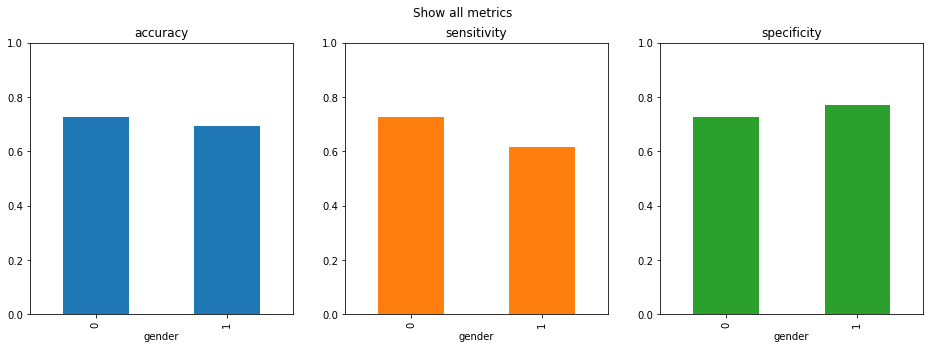

In [55]:
# results for default model 

get_values_of_aif_metrics(y_test_aif, model_svm.predict(X_test_aif))
print('')
plot_metrics(y_test_aif, X_test_aif, metrics, model_svm, 'gender')
print('')
classification_results(y_test_aif, model_svm.predict(X_test_aif))

Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
Using the level keyword in DataFrame and Seri

Statistical parity difference:  0.12237762237762234
Equal opportunity difference:  0.18881118881118886
Average odds difference:  0.1223776223776224
Disparate impact ratio:  1.2892561983471074
Theil index:  0.7357067949787411

        accuracy sensitivity specificity
gender                                  
0       0.681818    0.727273    0.636364
1       0.615385    0.538462    0.692308

[[16  8]
 [ 9 15]]
Accuracy:  0.6458333333333334
Sensitivity:  0.625
Specificity:  0.6666666666666666


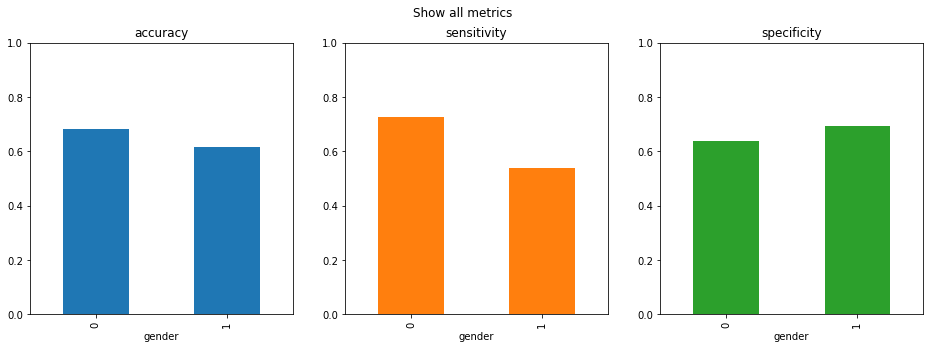

In [56]:
# results for debiased model with GridSearch

model_svm_fair = red.GridSearch(model_svm,
                               constraints=red.EqualizedOdds(),
                                sample_weight_name="classifier__sample_weight",
                              )
model_svm_fair.fit(X_train_aif, y_train_aif, sensitive_features=X_train_aif['gender'])

get_values_of_aif_metrics(y_test_aif, model_svm_fair.predict(X_test_aif))
print('')
plot_metrics(y_test_aif, X_test_aif, metrics, model_svm_fair, 'gender')
print('')
classification_results(y_test_aif, model_svm_fair.predict(X_test_aif))

Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
Using the level keyword in DataFrame and Seri

Statistical parity difference:  0.11538461538461536
Equal opportunity difference:  0.18881118881118886
Average odds difference:  0.11538461538461542
Disparate impact ratio:  1.2999999999999998
Theil index:  0.8266785731844678

        accuracy sensitivity specificity
gender                                  
0       0.727273    0.727273    0.727273
1       0.615385    0.538462    0.692308

[[18  6]
 [ 9 15]]
Accuracy:  0.6875
Sensitivity:  0.625
Specificity:  0.75


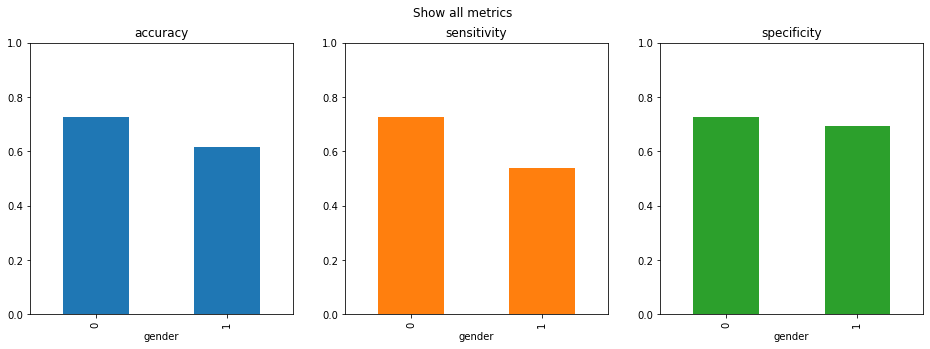

In [63]:
# results for debiased model with ExponentiatedGradient

model_svm_fair = red.ExponentiatedGradient(model_svm,
                               constraints=red.EqualizedOdds(),
                                sample_weight_name="classifier__sample_weight",
                              )
model_svm_fair.fit(X_train_aif, y_train_aif, sensitive_features=X_train_aif['gender'])

get_values_of_aif_metrics(y_test_aif, model_svm_fair.predict(X_test_aif))
print('')
plot_metrics(y_test_aif, X_test_aif, metrics, model_svm_fair, 'gender')
print('')
classification_results(y_test_aif, model_svm_fair.predict(X_test_aif))

#### Results:
Model's performance became worse

#### Results on the test set with debiasing

| Model       | LR       |  LR + GridSearch | LR + ExponentiatedGradient | 
|------       |------    |  ------          | ------                     |
| Accuracy    |  0.6875  |  0.75            |  0.7291                    | 
| Sensitivity |  0.7083  |  0.7083          |  0.7083                    | 
| Specificity |  0.6666  |  0.7916          |  0.75                      | 


##### Summary:  
LR + GridSearch obtained the best performance

---

#### Results on the test set with debiasing

| Model       | RF       |  RF + GridSearch | RF + ExponentiatedGradient | 
|------       |------    |  ------          | ------                     |
| Accuracy    |  0.6875  |  0.625           |  0.6875                    | 
| Sensitivity |  0.7083  |  0.5             |  0.5                       | 
| Specificity |  0.6666  |  0.75            |  0.875                     | 

##### Summary:  
Original model obtained the best performance

---

#### Results on the test set with debiasing

| Model       | SVM      | SVM + GridSearch |SVM + ExponentiatedGradient | 
|------       |------    |  ------          | ------                     |
| Accuracy    |  0.6875  |  0.6458          |  0.6875                    | 
| Sensitivity |  0.7083  |  0.625           |  0.625                     | 
| Specificity |  0.6666  |  0.6666          |  0.75                      | 

##### Summary:  
Original model obtained the best performance

---